# ADFA-LD NGRAM 1/2/3 EDA Analysis

* Training data for each attack is taken from first 7 files of each type
* Training data for Normal is taken from Training_Data_Master folder
* Test data for each attack is taken from last 3 files of each ype
* Test data is for Normal is taken from Validation_Data_Master
* Features have been created by extracting top 30% n-grams (frequency-wise) from all attack types and Normal
* For finding different n-grams, multiple values of n can be added into n_values list 





In [105]:

import glob
import math
from collections import Counter
import csv


# returns a dictionary of n-grams frequency for any list
def ngrams_freq(listname, n):
    counts = dict()
    # make n-grams as string iteratively
    grams = [' '.join(listname[i:i+n]) for i in range(len(listname)-n)]
    for gram in grams:
        if gram not in counts:
            counts[gram] = 1
        else:
            counts[gram] += 1
    return counts

# returns the values of features for any list
def feature_freq(listname,n,features):
	counts = dict()
	# make n-grams as string iteratively
	grams = [' '.join(listname[i:i+n]) for i in range(len(listname)-n)]
	for gram in grams:
		counts[gram] = 0
	for gram in grams:
		if gram in features:
			counts[gram] += 1
	return counts

# values of n for finding n-grams
n_values = [1]

# Base address for attack data files
add = "ADFA-LD/ADFA-LD/Attack_Data_Master/"
# list of attacks
attack = ['Adduser','Hydra_FTP','Hydra_SSH','Java_Meterpreter','Meterpreter','Web_Shell']

# initializing dictionary for n-grams from all files
traindict = {}


print("Generating Training Data ..................................")
for term in attack:
	print("	Training data from " + term)
	globals()['%s_list' % term] = []
	in_address = add+term
	k = 1
	# finding list of data from all files
	for i in range (1,8):
		read_files = glob.glob(in_address+"_"+str(i)+"/*.txt")
		for f in read_files:
			with open(f, "r") as infile:
				globals()['%s_list_array' % term+str(k)] = infile.read().split()
				globals()['%s_list' % term].extend(globals()['%s_list_array' % term+str(k)])
				k += 1
	# number of lists for distinct files
	globals()['%s_size' % term] = k-1
	# combined list of all files
	listname = globals()['%s_list' % term]
	# finding n-grams and extracting top 30%
	for n in n_values:
		print("		Extracting top 30% "+str(n)+"-grams from "+term+".......................")
		dictname = ngrams_freq(listname,n)
		top = math.ceil(0.3*len(dictname))
		dictname = Counter(dictname)
		for k, v in dictname.most_common(top):
			traindict.update({k : v})

# finding training data for Normal file
print("	Training data from Normal")
Normal_list = []
in_address = "ADFA-LD/ADFA-LD/Training_Data_Master/"
k = 1
read_files = glob.glob(in_address+"/*.txt")
for f in read_files:
	with open(f, "r") as infile:
		globals()['Normal%s_list_array' % str(k)] = infile.read().split()
		Normal_list.extend(globals()['Normal%s_list_array' % str(k)])
		k += 1

# number of lists for distinct files
Normal_list_size = k-1
# combined list of all files
listname = Normal_list
# finding n-grams and extracting top 30%
for n in n_values:
	print("		Extracting top 30% "+str(n)+"-grams from Normal........................")
	dictname = ngrams_freq(listname,n)
	top = math.ceil(0.3*len(dictname))
	dictname = Counter(dictname)
	for k, v in dictname.most_common(top):
		traindict.update({k : v})


# Creating feature list
features = []
features.append('Label')
for k,v in traindict.items():
	features.append(k)
print("\n			Features created by taking top 30% frequent n-grams for all types..........\n")


# Writing training data to file
print("\nWriting Training data in training file..................................\n")
with open('train.csv','w') as csvfile:
	# writing features as header 
	writer = csv.DictWriter(csvfile, fieldnames = features, extrasaction='ignore')
	writer.writeheader();

	# Calculating values of each feature for each file
	for term in attack:
		print("	Writing for "+term)
		for k in range (1,globals()['%s_size' % term]+1):
			listname = globals()['%s_list_array' % term+str(k)]
			feature_count = {}
			for n in n_values:
				#print("		Calculating "+str(n)+"-gram feature frequency for files in "+term)
				feature_count.update(feature_freq(listname,n,features))
			feature_count.update({'Label' : term})
			for f in features:
				if f not in feature_count:
					feature_count.update({f : 0})
			writer.writerow(feature_count)

	# Calculating values of each feature for each file
	print("	Writing for Normal")
	for k in range (1,Normal_list_size+1):
		listname = globals()['Normal%s_list_array' % str(k)]
		feature_count = {}
		for n in n_values:
			#print("		Calculating "+str(n)+"-gram feature frequency for files in Normal")
			feature_count.update(feature_freq(listname,n,features))
		feature_count.update({'Label' : 'Normal'})
		for f in features:
			if f not in feature_count:
				feature_count.update({f : 0})
		writer.writerow(feature_count)

print("\ntrain.csv created..............................................\n")
	

Generating Training Data ..................................
	Training data from Adduser
		Extracting top 30% 1-grams from Adduser.......................
	Training data from Hydra_FTP
		Extracting top 30% 1-grams from Hydra_FTP.......................
	Training data from Hydra_SSH
		Extracting top 30% 1-grams from Hydra_SSH.......................
	Training data from Java_Meterpreter
		Extracting top 30% 1-grams from Java_Meterpreter.......................
	Training data from Meterpreter
		Extracting top 30% 1-grams from Meterpreter.......................
	Training data from Web_Shell
		Extracting top 30% 1-grams from Web_Shell.......................
	Training data from Normal
		Extracting top 30% 1-grams from Normal........................

			Features created by taking top 30% frequent n-grams for all types..........


Writing Training data in training file..................................

	Writing for Adduser
	Writing for Hydra_FTP
	Writing for Hydra_SSH
	Writing for Java_Meterpreter

In [231]:
print("Generating Test Data ..................................")
for term in attack:
	print("	Test data from " + term)
	globals()['%s_test_list' % term] = []
	in_address = add+term
	k = 1
	# finding list of data from all files
	for i in range (8,11):
		read_files = glob.glob(in_address+"_"+str(i)+"/*.txt")
		for f in read_files:
			with open(f, "r") as infile:
				globals()['%s_test_list_array' % term+str(k)] = infile.read().split()
				globals()['%s_test_list' % term].extend(globals()['%s_test_list_array' % term+str(k)])
				k += 1
	# number of lists for distinct files
	globals()['%s_test_size' % term] = k-1
	
	
print("	Test data from Normal")
Normal_test_list = []
in_address = "ADFA-LD/ADFA-LD/Validation_Data_Master/"
k = 1
read_files = glob.glob(in_address+"/*.txt")
# finding list of data from all files
for f in read_files:
	with open(f, "r") as infile:
		globals()['Normal%s_test_list_array' % str(k)] = infile.read().split()
		Normal_test_list.extend(globals()['Normal%s_test_list_array' % str(k)])
		k += 1
# number of lists for distinct files
Normal_test_list_size = k-1



# Writing test data to file
print("\nWriting Test data in test file..................................\n")
with open('test.csv','w') as csvfile:
	#features.remove('Label')
	writer = csv.DictWriter(csvfile, fieldnames = features, extrasaction='ignore')
	writer.writeheader();

	# Calculating values of each feature for each file
	for term in attack:
		print("	Writing for "+term)
		for k in range (1,globals()['%s_test_size' % term]+1):
			listname = globals()['%s_test_list_array' % term+str(k)]
			feature_count = {}
			for n in n_values:
				#print("		Calculating "+str(n)+"-gram feature frequency for files in "+term)
				feature_count.update(feature_freq(listname,n,features))
			for f in features:
				if f not in feature_count:
					feature_count.update({f : 0})
			writer.writerow(feature_count)

	# Calculating values of each feature for each file
	print("	Writing for Normal")
	for k in range (1,Normal_test_list_size+1):
		listname = globals()['Normal%s_test_list_array' % str(k)]
		feature_count = {}
		for n in n_values:
			#print("		Calculating "+str(n)+"-gram feature frequency for files in Normal")
			feature_count.update(feature_freq(listname,n,features))
		for f in features:
			if f not in feature_count:
				feature_count.update({f : 0})
		writer.writerow(feature_count)

print("\ntest.csv created..............................................\n")

print("Done")



Generating Test Data ..................................
	Test data from Adduser
	Test data from Hydra_FTP
	Test data from Hydra_SSH
	Test data from Java_Meterpreter
	Test data from Meterpreter
	Test data from Web_Shell
	Test data from Normal

Writing Test data in test file..................................

	Writing for Adduser
	Writing for Hydra_FTP
	Writing for Hydra_SSH
	Writing for Java_Meterpreter
	Writing for Meterpreter
	Writing for Web_Shell
	Writing for Normal

test.csv created..............................................

Done


# EDA on ngrams in th train Data


In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [149]:
train_bl = pd.read_csv("./train_baseline.csv")
train_bl.head(5)
train_bl = train_bl.astype(object)
train_bl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Columns: 151 entries, Label to 185
dtypes: object(151)
memory usage: 1.5+ MB


In [153]:
train_bl.describe()

,Label,168,265,3,54,162,142,309,146,114,...,75,198,259,260,264,110,322,233,224,185
count,1338,1338,1338,1338,1338,1338,1338,1338,1338,1338,...,1338,1338,1338,1338,1338,1338,1338,1338,1338,1338
unique,7,224,218,260,41,25,70,26,70,43,...,2,2,2,2,1,2,2,2,2,2
top,Normal,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
freq,833,914,863,221,992,1262,1181,1311,1133,1270,...,1337,1337,1337,1337,1338,1337,1337,1337,1337,1337


In [156]:
test_bl = pd.read_csv("./test_baseline.csv")
test_bl.head(5)
test_bl = test_bl.astype(object)

In [157]:
test_bl.describe()

,168,265,3,54,162,142,309,146,114,175,...,75,198,259,260,264,110,322,233,224,185
count,4613,4613,4613,4613,4613,4613,4613,4613,4613,4613,...,4613,4613,4613,4613,4613,4613,4613,4613,4613,4613
unique,380,296,403,73,37,136,39,131,35,133,...,3,1,2,2,2,2,1,1,2,2
top,0,0,25,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
freq,2112,3441,1096,2731,4473,4212,4554,3952,4375,2047,...,4591,4613,4609,4609,4610,4609,4613,4613,4596,4604


# ADFA-LD NGRAM 1-GRAM EDA Analysis

In [193]:
train_1n = pd.read_csv("./train_1n.csv")
train_1n.head()
train_ln = train_1n.astype(object)
df_1n = train_1n.groupby('Label').sum()
df_1n.reset_index(inplace=True)
df_1n = df_1n.astype(object)
#df_1n.head()

collist = list(df_1n.columns.values.tolist()) 
collist.remove('Label')
#collist

#df_1n.plot(x="Label", y=collist, kind="bar", figsize=(15,15))

In [191]:
df_1n.describe()

,Label,168,265,3,54,162,142,309,146,114,...,11,1,252,201,243,199,308,122,118,219
count,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
unique,7,7,7,7,7,7,7,6,7,6,...,6,2,2,5,6,5,2,6,2,4
top,Meterpreter,6829,8207,3727,2766,31,1423,0,596,0,...,5,0,0,0,5,0,0,17,0,0
freq,1,1,1,1,1,1,1,2,1,2,...,2,6,6,3,2,3,6,2,6,4


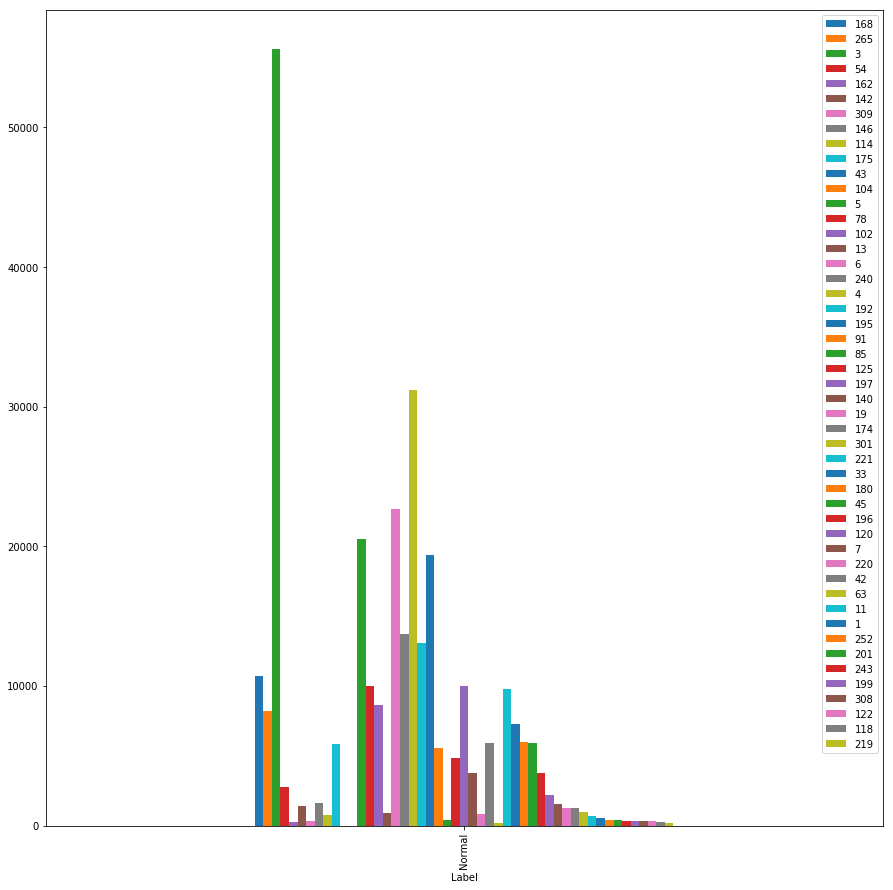

In [161]:
df_1n_normal = df_1n[df_1n['Label'] == 'Normal']
df_1n_normal.plot(x="Label", y=collist, kind="bar", figsize=(15,15))

In [171]:
df_1n_normal = df_1n_normal.astype(object)
df_1n_normal.describe()

,Label,168,265,3,54,162,142,309,146,114,...,11,1,252,201,243,199,308,122,118,219
count,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
unique,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
top,Normal,10714,8207,55611,2766,257,1423,333,1602,774,...,701,539,390,378,353,345,315,297,284,180
freq,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


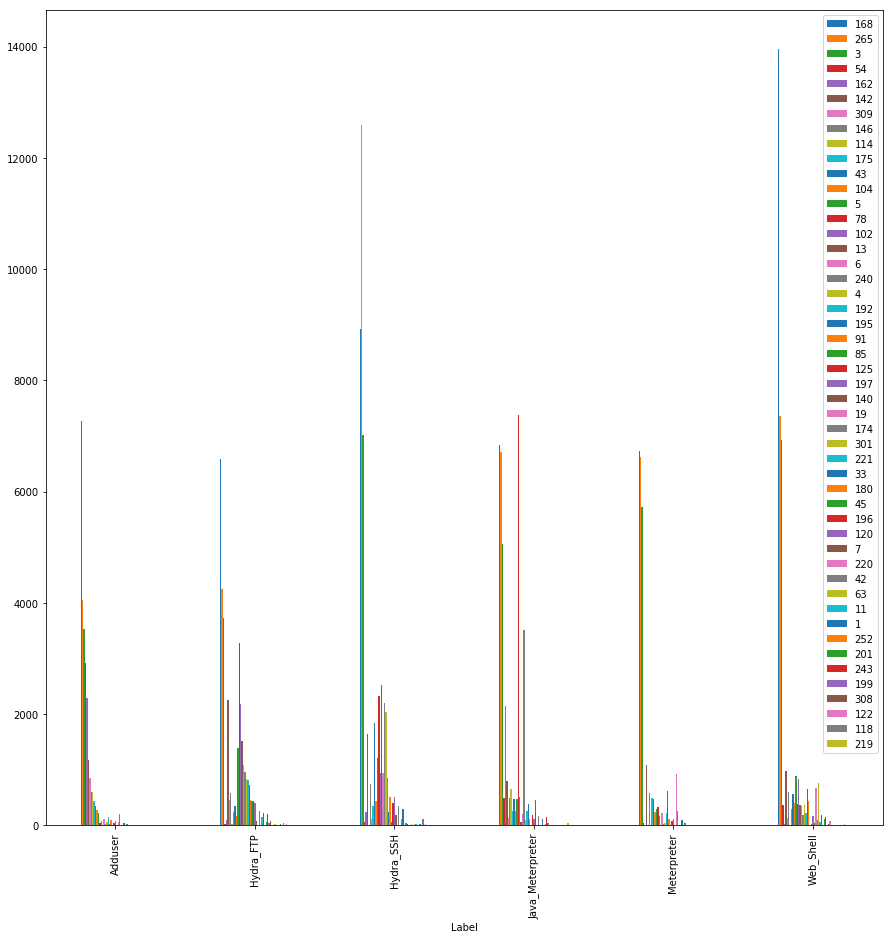

In [162]:
df_1n_attack = df_1n[df_1n['Label'].isin(attack)]
df_1n_attack.plot(x="Label", y=collist, kind="bar", figsize=(15,15))

In [176]:
#attack = ['Adduser','Hydra_FTP','Hydra_SSH','Java_Meterpreter','Meterpreter','Web_Shell']
df_1n_attack = df_1n_attack.astype(object)
df_1n_attack[df_1n_attack['Label'] == 'Adduser'].describe()


,Label,168,265,3,54,162,142,309,146,114,...,11,1,252,201,243,199,308,122,118,219
count,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
unique,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
top,Adduser,7270,4058,3534,2915,2284,1175,858,606,604,...,5,0,0,0,5,0,0,6,0,0
freq,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [183]:
df_1n_attack = df_1n_attack.astype(object)
df_1n_attack[df_1n_attack['Label'] == 'Hydra_FTP'].describe()

,Label,168,265,3,54,162,142,309,146,114,...,11,1,252,201,243,199,308,122,118,219
count,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
unique,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
top,Hydra_FTP,6582,4248,3727,20,91,2259,448,577,21,...,5,0,0,23,4,35,0,16,0,0
freq,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [178]:
df_1n_attack = df_1n_attack.astype(object)
df_1n_attack[df_1n_attack['Label'] == 'Hydra_SSH'].describe()

,Label,168,265,3,54,162,142,309,146,114,...,11,1,252,201,243,199,308,122,118,219
count,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
unique,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
top,Hydra_SSH,8925,12590,7021,58,231,1649,0,739,116,...,18,0,0,31,14,115,0,17,0,0
freq,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [179]:
df_1n_attack = df_1n_attack.astype(object)
df_1n_attack[df_1n_attack['Label'] == 'Java_Meterpreter'].describe()

,Label,168,265,3,54,162,142,309,146,114,...,11,1,252,201,243,199,308,122,118,219
count,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
unique,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
top,Java_Meterpreter,6829,6707,5050,490,2154,804,129,498,653,...,6,0,0,5,5,3,0,12,0,50
freq,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [180]:
df_1n_attack = df_1n_attack.astype(object)
df_1n_attack[df_1n_attack['Label'] == 'Meterpreter'].describe()

,Label,168,265,3,54,162,142,309,146,114,...,11,1,252,201,243,199,308,122,118,219
count,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
unique,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
top,Meterpreter,6732,6625,5722,37,1,1087,0,580,0,...,7,0,0,0,7,0,0,7,0,2
freq,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [181]:
df_1n_attack = df_1n_attack.astype(object)
df_1n_attack[df_1n_attack['Label'] == 'Web_Shell'].describe()

,Label,168,265,3,54,162,142,309,146,114,...,11,1,252,201,243,199,308,122,118,219
count,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
unique,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
top,Web_Shell,13963,7367,6932,364,31,977,124,596,0,...,3,0,0,0,3,0,0,17,0,0
freq,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


# ADFA-LD NGRAM 2-GRAM EDA Analysis

In [230]:
train_2n = pd.read_csv("./train_2n.csv")
train_2n = train_2n.astype(object)
df_2n = train_2n.groupby('Label').sum()
df_2n.reset_index(inplace=True)
df_2n = df_2n.astype(object)

collist_2 = list(df_2n.columns.values.tolist()) 
collist_2.remove('Label')
#collist

#df_2n.plot(x="Label", y=collist_2, kind="bar", figsize=(20,20))

In [197]:
df_2n.describe()

,Label,168 168,54 54,168 265,162 162,265 168,3 168,168 3,265 265,3 3,...,120 63,201 200,201 120,33 140,4 194,54 221,91 10,141 5,197 160,120 221
count,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
unique,7,7,7,7,6,7,7,7,7,7,...,3,2,2,2,2,3,3,6,2,2
top,Meterpreter,2957,335,3436,0,3343,973,1214,2270,2047,...,0,0,0,0,0,0,0,1,0,0
freq,1,1,1,1,2,1,1,1,1,1,...,5,6,6,6,6,5,5,2,6,6


In [ ]:
df_2n_normal = df_2n[df_2n['Label'] == 'Normal']
df_2n_normal.plot(x="Label", y=collist_2, kind="bar", figsize=(30,30))

In [200]:
df_2n_normal = df_2n_normal.astype(object)
df_2n_normal.describe()

,Label,168 168,54 54,168 265,162 162,265 168,3 168,168 3,265 265,3 3,...,120 63,201 200,201 120,33 140,4 194,54 221,91 10,141 5,197 160,120 221
count,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
unique,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
top,Normal,2044,1234,825,28,1610,1591,2188,1993,31509,...,18,18,18,18,17,16,17,17,17,17
freq,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


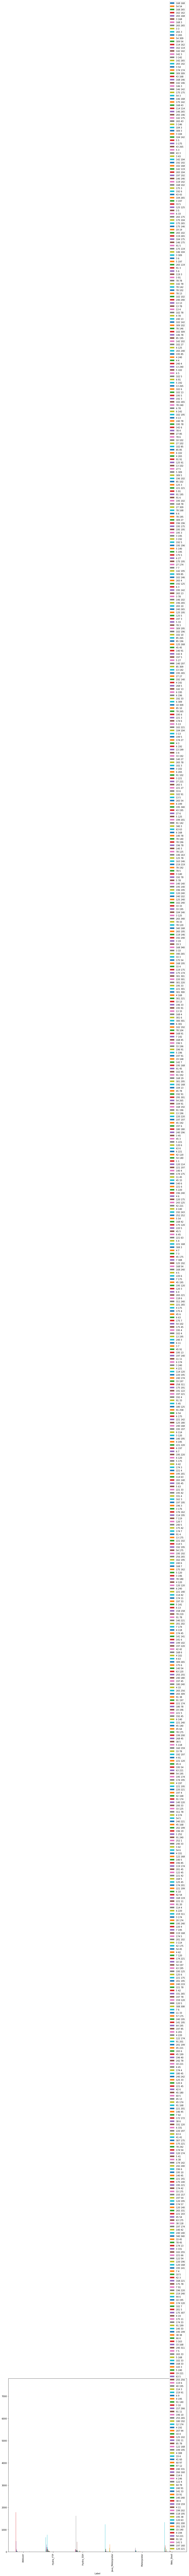

In [202]:
df_2n_attack = df_2n[df_2n['Label'].isin(attack)]
df_2n_attack.plot(x="Label", y=collist_2, kind="bar", figsize=(15,15))

In [203]:
df_2n_attack = df_2n_attack.astype(object)
df_2n_attack[df_2n_attack['Label'] == 'Adduser'].describe()

,Label,168 168,54 54,168 265,162 162,265 168,3 168,168 3,265 265,3 3,...,120 63,201 200,201 120,33 140,4 194,54 221,91 10,141 5,197 160,120 221
count,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
unique,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
top,Adduser,3937,2072,1828,1785,1787,1147,1106,954,745,...,0,0,0,0,0,0,0,1,0,0
freq,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [204]:
df_2n_attack = df_2n_attack.astype(object)
df_2n_attack[df_2n_attack['Label'] == 'Hydra_FTP'].describe()

,Label,168 168,54 54,168 265,162 162,265 168,3 168,168 3,265 265,3 3,...,120 63,201 200,201 120,33 140,4 194,54 221,91 10,141 5,197 160,120 221
count,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
unique,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
top,Hydra_FTP,3660,6,1680,54,1563,973,884,1058,1024,...,1,0,0,0,0,1,0,1,0,0
freq,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [205]:
df_2n_attack = df_2n_attack.astype(object)
df_2n_attack[df_2n_attack['Label'] == 'Hydra_SSH'].describe()

,Label,168 168,54 54,168 265,162 162,265 168,3 168,168 3,265 265,3 3,...,120 63,201 200,201 120,33 140,4 194,54 221,91 10,141 5,197 160,120 221
count,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
unique,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
top,Hydra_SSH,3126,12,4640,113,3666,1234,748,3587,1489,...,0,0,0,0,0,0,0,4,0,0
freq,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [206]:
df_2n_attack = df_2n_attack.astype(object)
df_2n_attack[df_2n_attack['Label'] == 'Java_Meterpreter'].describe()

,Label,168 168,54 54,168 265,162 162,265 168,3 168,168 3,265 265,3 3,...,120 63,201 200,201 120,33 140,4 194,54 221,91 10,141 5,197 160,120 221
count,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
unique,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
top,Java_Meterpreter,2957,335,2312,1638,2215,1317,1214,2109,1165,...,0,0,0,0,0,0,0,0,0,0
freq,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [207]:
df_2n_attack = df_2n_attack.astype(object)
df_2n_attack[df_2n_attack['Label'] == 'Meterpreter'].describe()

,Label,168 168,54 54,168 265,162 162,265 168,3 168,168 3,265 265,3 3,...,120 63,201 200,201 120,33 140,4 194,54 221,91 10,141 5,197 160,120 221
count,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
unique,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
top,Meterpreter,2756,16,2330,0,2333,1258,1289,2270,1834,...,0,0,0,0,0,0,0,2,0,0
freq,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [208]:
df_2n_attack = df_2n_attack.astype(object)
df_2n_attack[df_2n_attack['Label'] == 'Web_Shell'].describe()

,Label,168 168,54 54,168 265,162 162,265 168,3 168,168 3,265 265,3 3,...,120 63,201 200,201 120,33 140,4 194,54 221,91 10,141 5,197 160,120 221
count,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
unique,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
top,Web_Shell,7428,223,3436,0,3343,1972,1909,1972,2047,...,0,0,0,0,0,0,1,3,0,0
freq,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


# ADFA-LD NGRAM 3-GRAM EDA Analysis

In [213]:
train_3n = pd.read_csv("./train_3n.csv")
train_3n = train_3n.astype(object)
df_3n = train_3n.groupby('Label').sum()
df_3n.reset_index(inplace=True)
df_3n = df_3n.astype(object)

collist_3 = list(df_3n.columns.values.tolist()) 
collist_3.remove('Label')
#collist

#df_3n.plot(x="Label", y=collist_3, kind="bar", figsize=(20,20))


In [214]:

df_3n_normal = df_3n[df_3n['Label'] == 'Normal']
#df_3n_normal.plot(x="Label", y=collist_3, kind="bar", figsize=(15,15))


In [215]:

df_3n_normal = df_3n_normal.astype(object)
df_3n_normal.describe()


,Label,168 168 168,54 54 54,162 162 162,168 265 168,265 168 168,168 168 265,168 3 168,168 168 3,3 168 168,...,42 120 142,140 221 3,174 174 142,54 195 201,63 120 63,3 192 140,6 195 54,6 91 60,91 60 5,85 196 5
count,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
unique,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
top,Normal,620,890,20,170,181,108,400,252,225,...,5,5,2,5,5,5,5,5,5,5
freq,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [218]:
df_3n_attack = df_3n[df_3n['Label'].isin(attack)]
#df_1n_attack.plot(x="Label", y=collist_2, kind="bar", figsize=(15,15))
df_3n_attack = df_3n_attack.astype(object)
df_3n_attack[df_3n_attack['Label'] == 'Adduser'].describe()


,Label,168 168 168,54 54 54,162 162 162,168 265 168,265 168 168,168 168 265,168 3 168,168 168 3,3 168 168,...,42 120 142,140 221 3,174 174 142,54 195 201,63 120 63,3 192 140,6 195 54,6 91 60,91 60 5,85 196 5
count,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
unique,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
top,Adduser,2291,1464,1405,987,935,918,586,551,531,...,0,0,0,0,0,0,0,0,0,0
freq,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [219]:

df_3n_attack = df_3n_attack.astype(object)
df_3n_attack[df_3n_attack['Label'] == 'Hydra_FTP'].describe()


,Label,168 168 168,54 54 54,162 162 162,168 265 168,265 168 168,168 168 265,168 3 168,168 168 3,3 168 168,...,42 120 142,140 221 3,174 174 142,54 195 201,63 120 63,3 192 140,6 195 54,6 91 60,91 60 5,85 196 5
count,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
unique,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
top,Hydra_FTP,2173,4,40,856,839,891,469,437,484,...,0,0,0,0,0,0,0,0,0,2
freq,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [220]:

df_3n_attack = df_3n_attack.astype(object)
df_3n_attack[df_3n_attack['Label'] == 'Hydra_SSH'].describe()


,Label,168 168 168,54 54 54,162 162 162,168 265 168,265 168 168,168 168 265,168 3 168,168 168 3,3 168 168,...,42 120 142,140 221 3,174 174 142,54 195 201,63 120 63,3 192 140,6 195 54,6 91 60,91 60 5,85 196 5
count,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
unique,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
top,Hydra_SSH,1180,8,63,899,1239,1506,331,267,475,...,0,0,0,0,0,0,0,0,0,0
freq,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [221]:
df_3n_attack = df_3n_attack.astype(object)
df_3n_attack[df_3n_attack['Label'] == 'Java_Meterpreter'].describe()


,Label,168 168 168,54 54 54,162 162 162,168 265 168,265 168 168,168 168 265,168 3 168,168 168 3,3 168 168,...,42 120 142,140 221 3,174 174 142,54 195 201,63 120 63,3 192 140,6 195 54,6 91 60,91 60 5,85 196 5
count,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
unique,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
top,Java_Meterpreter,1415,228,1250,1001,924,942,502,440,483,...,0,0,0,0,0,0,0,0,0,0
freq,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [222]:

df_3n_attack = df_3n_attack.astype(object)
df_3n_attack[df_3n_attack['Label'] == 'Meterpreter'].describe()


,Label,168 168 168,54 54 54,162 162 162,168 265 168,265 168 168,168 168 265,168 3 168,168 168 3,3 168 168,...,42 120 142,140 221 3,174 174 142,54 195 201,63 120 63,3 192 140,6 195 54,6 91 60,91 60 5,85 196 5
count,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
unique,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
top,Meterpreter,1276,9,0,974,908,902,542,440,436,...,0,0,0,0,0,0,0,0,0,0
freq,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [226]:
df_3n_attack = df_3n_attack.astype(object)
df_3n_attack[df_3n_attack['Label'] == 'Web_Shell'].describe()

,Label,168 168 168,54 54 54,162 162 162,168 265 168,265 168 168,168 168 265,168 3 168,168 168 3,3 168 168,...,42 120 142,140 221 3,174 174 142,54 195 201,63 120 63,3 192 140,6 195 54,6 91 60,91 60 5,85 196 5
count,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
unique,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
top,Web_Shell,4308,143,0,1805,1709,1751,945,902,935,...,0,0,0,0,0,0,0,0,0,0
freq,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
